# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import random

from scipy.stats import linregress

from config import api_key
from citipy import citipy

## Generate Cities List

In [4]:
#Create the lists to hold the data

cities_raw = []

#create random latitude and longitude values and combine them into a single DataFrame
#doing more than 500 because of duplicates (i tried doing 1500 and got a lot of dupes)
#tried pd.concat for lat_long and couldn't get it to work, found zip() and hope it works
lats = [random.randrange(-90,90) for i in range(2000)]
lngs = [random.randrange(-90,90) for i in range(2000)]
lat_lngs = zip(lats, lngs)

for coord in lat_lngs:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    cities_raw.append(city)

#need to remove the duplicate cities, I think I could have done this up front, but I was having trouble getting it to run
cities_unique = []
[cities_unique.append(x) for x in cities_raw if x not in cities_unique]
cities_unique

['grindavik',
 'belushya guba',
 'bako',
 'port alfred',
 'cervo',
 'portmore',
 'necochea',
 'mancio lima',
 'nurota',
 'havelock',
 'sioux lookout',
 'kegayli',
 'ushuaia',
 'carballo',
 'ayagoz',
 'taolanaro',
 'gao',
 'bayan',
 'kudahuvadhoo',
 'bredasdorp',
 'hermanus',
 'rio grande',
 'vardo',
 'mazara del vallo',
 'vila velha',
 'punta arenas',
 'touros',
 'hithadhoo',
 'busselton',
 'moose factory',
 'yar-sale',
 'itarema',
 'paytug',
 'camacha',
 'mosquera',
 'barentsburg',
 'qaanaaq',
 'salalah',
 'bardiyah',
 'mlalo',
 'varhaug',
 'tsihombe',
 'fomboni',
 'tabarqah',
 'mwene-ditu',
 'piacabucu',
 'victoria',
 'araioses',
 'matagami',
 'acarau',
 'laguna',
 'yurla',
 'ilulissat',
 'iralaya',
 'jamestown',
 'illoqqortoormiut',
 'coihaique',
 'amderma',
 'marathon',
 'harper',
 'jeremoabo',
 'torbay',
 'tocopilla',
 'klaksvik',
 'namibe',
 'umzimvubu',
 'louisbourg',
 'lagoa',
 'narasannapeta',
 'zhezkazgan',
 'longyearbyen',
 'andenes',
 'birao',
 'aswan',
 'vologda',
 'araoua

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#set my request stuff (taken from previous class activities)
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = weather_url + "appid=" + api_key + "&units=" + units + "&q="

#set up my containers to add the data that it finds (if the city can be found)
city_builder = []
latitude = []
longitude = []
country = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

#thought it might be fun to see which cities it can't find, don't know if i'll do something with this or not
lonely_city = []

#per the instructions, I need to have a record processing count and print out the record as it processes?
record_counter = 0


#OpenWeatherMap url + api key & modifications needed for call
for city in cities_unique:
    
    getter = f"{query_url}{city}"

    response=requests.get(getter).json()
    
    try:
        city_builder.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        record_counter += 1
        
        print(f"Record {record_counter}: {city} being processed")
    except:
        record_counter += 1
        lonely_city.append({city})
        print(f"Record {record_counter}: {city} could not be located, skipped for processing")
        pass

Record 1: grindavik being processed
Record 2: belushya guba could not be located, skipped for processing
Record 3: bako being processed
Record 4: port alfred being processed
Record 5: cervo being processed
Record 6: portmore being processed
Record 7: necochea being processed
Record 8: mancio lima being processed
Record 9: nurota being processed
Record 10: havelock being processed
Record 11: sioux lookout being processed
Record 12: kegayli could not be located, skipped for processing
Record 13: ushuaia being processed
Record 14: carballo being processed
Record 15: ayagoz being processed
Record 16: taolanaro could not be located, skipped for processing
Record 17: gao being processed
Record 18: bayan being processed
Record 19: kudahuvadhoo being processed
Record 20: bredasdorp being processed
Record 21: hermanus being processed
Record 22: rio grande being processed
Record 23: vardo being processed
Record 24: mazara del vallo being processed
Record 25: vila velha being processed
Record 26:

Record 207: san isidro being processed
Record 208: saint-pierre being processed
Record 209: bandarbeyla being processed
Record 210: gat being processed
Record 211: armacao dos buzios could not be located, skipped for processing
Record 212: vieux-habitants being processed
Record 213: thyolo being processed
Record 214: koutsouras being processed
Record 215: iqaluit being processed
Record 216: nuuk being processed
Record 217: abrau-dyurso being processed
Record 218: saldanha being processed
Record 219: pisco being processed
Record 220: issoudun being processed
Record 221: doba being processed
Record 222: lukovetskiy being processed
Record 223: dzhusaly could not be located, skipped for processing
Record 224: srikakulam being processed
Record 225: adrar being processed
Record 226: aksay being processed
Record 227: mocambique could not be located, skipped for processing
Record 228: tostamaa could not be located, skipped for processing
Record 229: kisangani being processed
Record 230: vallad

Record 418: itacoatiara being processed
Record 419: cravo norte being processed
Record 420: carauari being processed
Record 421: borgarnes being processed
Record 422: stromness being processed
Record 423: brigantine being processed
Record 424: george being processed
Record 425: puerto del rosario being processed
Record 426: abha being processed
Record 427: pavilosta being processed
Record 428: malakal being processed
Record 429: kjollefjord being processed
Record 430: baboua could not be located, skipped for processing
Record 431: istisu being processed
Record 432: tawkar could not be located, skipped for processing
Record 433: san matias being processed
Record 434: bennington being processed
Record 435: keetmanshoop being processed
Record 436: conde being processed
Record 437: suruc being processed
Record 438: sibut being processed
Record 439: puerto colombia being processed
Record 440: jaleswar being processed
Record 441: san borja being processed
Record 442: jawa being processed
Rec

Record 627: malindi being processed
Record 628: manturovo being processed
Record 629: barreirinha being processed
Record 630: takoradi being processed
Record 631: samandag being processed
Record 632: west bay being processed
Record 633: capoterra being processed
Record 634: marawi being processed
Record 635: zambezi being processed
Record 636: le port being processed
Record 637: caravelas being processed
Record 638: leh being processed
Record 639: kindu being processed
Record 640: bokspits could not be located, skipped for processing
Record 641: wala being processed
Record 642: gurupi being processed
Record 643: mezen being processed
Record 644: ust-ishim being processed
Record 645: djibo being processed
Record 646: lieksa being processed
Record 647: vavuniya being processed
Record 648: carbonia being processed
Record 649: mahaicony could not be located, skipped for processing
Record 650: monte alegre being processed
Record 651: sault sainte marie being processed
Record 652: matara bei

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create df
city_results_df = pd.DataFrame({'City': city_builder,
                       'Country': country,
                       'Lat': latitude,
                       'Lng': longitude,
                       'Max Temp': max_temp,
                       'Humidity': humidity,
                       'Cloudiness': cloudiness,
                       'Wind Speed': wind_speed,
                       'Date': date})
city_results_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Grindavik,IS,63.8424,-22.4338,52.56,100,90,9.22,1628039180
1,Bako,ET,5.7833,36.5667,67.21,61,99,3.87,1628039180
2,Port Alfred,ZA,-33.5906,26.8910,64.26,39,0,10.40,1628039181
3,Cervo,ES,43.6702,-7.4101,68.20,91,100,10.02,1628039181
4,Portmore,JM,17.9702,-76.8672,84.16,75,75,11.50,1628039181
...,...,...,...,...,...,...,...,...,...
692,Ambikāpur,IN,23.1167,83.2000,73.04,91,85,4.12,1628039374
693,Ozar,IN,20.1000,73.9333,72.79,89,100,17.45,1628039374
694,Muyezerskiy,RU,63.9333,31.6500,46.92,93,100,16.24,1628039375
695,Gondā City,IN,27.1333,81.9333,79.79,85,91,4.27,1628039375


In [7]:
#export city results to CSV
output = "Outputs/city_results.csv"
city_results_df.to_csv(output, encoding="utf-8", index=False)

### This next part is just for fun to see how my random number generator picked diff geo locations

* I honestly have no idea why I'm doing this, I need to actual finish the homework first, but my curiosity is getting the better of me

In [8]:
#get a list of unique countries
countries_rep = []
[countries_rep.append(x) for x in city_results_df["Country"] if x not in countries_rep]

#get the open bank URL set up
#general url setup openbank_url + "RU" + "?format=json"
openbank_url = "http://api.worldbank.org/v2/country/"
url_ender = "?format=json"

#set up my lists to hold my response values
country_name = []
country_region = []
country_code = []
lonely_country = []

#run that loop de loop
for country in countries_rep:

    getter2 = f"{openbank_url}{country}{url_ender}"

    response=requests.get(getter2).json()
    
    try:
        country_code.append(response[1][0]["iso2Code"])
        country_name.append(response[1][0]["name"])
        country_region.append(response[1][0]["region"]["value"])
    except:
        lonely_country.append({country})
        pass

In [9]:
#create the data fram
country_df = pd.DataFrame({
    "Country Code":country_code,
    "Country Name":country_name,
    "World Region":country_region
})
country_df

region_df = pd.DataFrame(country_df["World Region"].value_counts())
region_df


,World Region
Sub-Saharan Africa,41
Europe & Central Asia,33
Latin America & Caribbean,23
Middle East & North Africa,14
East Asia & Pacific,6
South Asia,5
North America,2


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

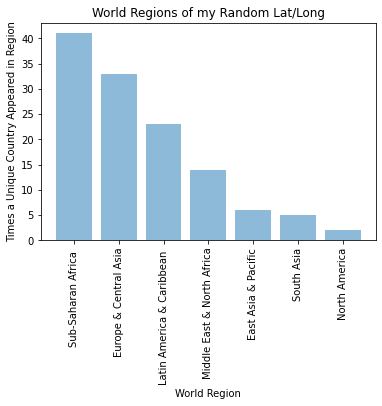

In [10]:
#Here is how many times each unique country aligned to a specific region of the world
plt.bar(region_df.index, region_df["World Region"], alpha=0.5, align="center")
plt.title("World Regions of my Random Lat/Long")
plt.xlabel("World Region")
plt.ylabel("Times a Unique Country Appeared in Region")
plt.xticks(rotation="90")

### Back to the homework, plotting requirements
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

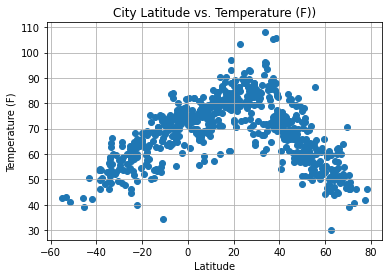

In [11]:
#Plotting Temp v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Max Temp']

fig = plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Temperature (F))')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.savefig('Outputs/temperature_vs_latitude.png')

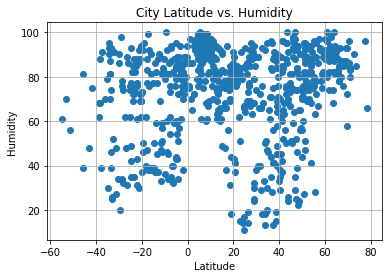

In [12]:
#Plotting Humidity v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Humidity']

fig = plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('Outputs/humidity_vs_latitude.png')

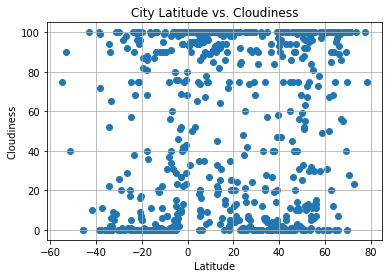

In [13]:
#Plotting cloudiness v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Cloudiness']

fig = plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('Outputs/cloudiness_vs_latitude.png')

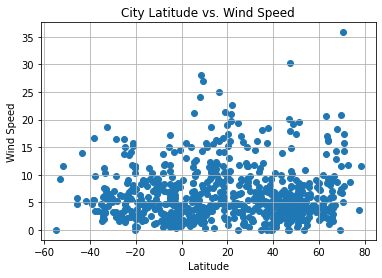

In [14]:
#Plotting wind speed v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Wind Speed']

fig = plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('Outputs/wind_speed_vs_latitude.png')

### Linear Regression Plotting Requirements
* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [15]:
#isolate my data into different hemispheres
northern = city_results_df.loc[city_results_df['Lat'] >= 0]
southern = city_results_df.loc[city_results_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4089876271186014


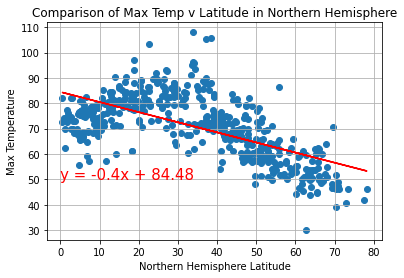

In [16]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = northern["Lat"]
y_values = northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Max Temperature')
plt.title("Comparison of Max Temp v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Outputs/temp_v_lat_northern.png')
plt.grid()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6182266193884673


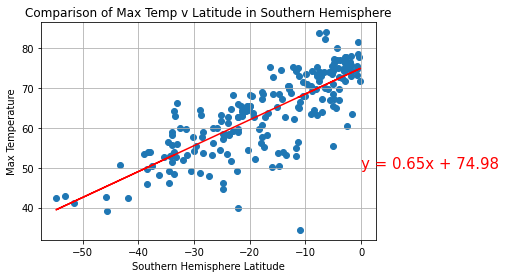

In [17]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = southern["Lat"]
y_values = southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Max Temperature')
plt.title("Comparison of Max Temp v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Outputs/temp_v_lat_southern.png')
plt.grid()

### Regression Analysis Temp v Latitude

These graphs show that there is definitely show a negative and positive relationship respectivitely. Of all the plotted linear regression graphs, these two show the most in terms of relationship. As the Latitude approaches the equator the max temp goes up, and when the Latitude draws away from the equator the max temp goes down. This is a fairly, non-controversial and accepted understanding of the relationship between latitude and max temp based on Earth's position/rotation and angular orientation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 9.444528718798869e-05


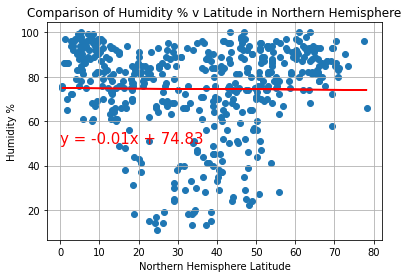

In [18]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = northern["Lat"]
y_values = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity %')
plt.title("Comparison of Humidity % v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Outputs/humidity_v_lat_northern.png')
plt.grid()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010642885033494238


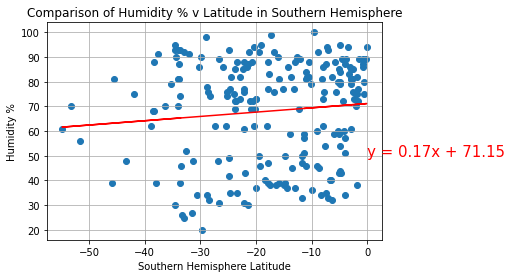

In [19]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = southern["Lat"]
y_values = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity %')
plt.title("Comparison of Humidity % v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Outputs/humidity_v_lat_southern.png')
plt.grid()

### Regression Analysis Humidity v Latitude

The relationship between Humidity and Latitude is not a strong as the temperature. You can see the line clearly moving up or down based on the proximity to the Equator, but Humidity has a lot of factors that play into it aside from Latitude. My samples could be closer or further from specific geographic interests like large bodies of water or rainforests. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0020770568054336042


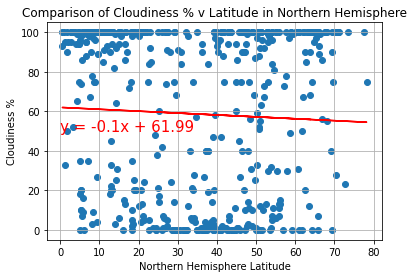

In [20]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness %')
plt.title("Comparison of Cloudiness % v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Outputs/cloudiness_v_lat_northern.png')
plt.grid()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015390853688097684


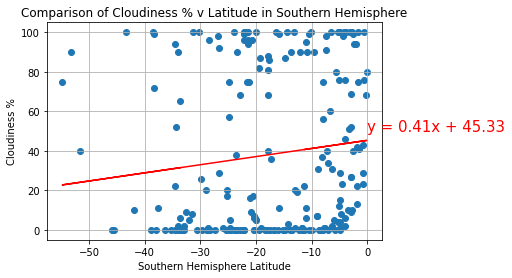

In [21]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness %')
plt.title("Comparison of Cloudiness % v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Outputs/cloudiness_v_lat_southern.png')
plt.grid()

### Regression Analysis Cloudiness v Latitude

Same situation with cloudiness as with humidity, the relationship is there, but it is not as strong as max temp. You can see the line clearly moving up or down based on the proximity to the Equator, but the Data is very spread out and hovers a lot around 0 and 100, and I'm not certain a linear regression even holds up for these data sets.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00032548046398849244


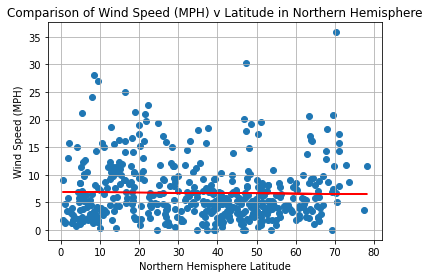

In [24]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = northern["Lat"]
y_values = northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Comparison of Wind Speed (MPH) v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Outputs/wind_speed_v_lat_northern.png')
plt.grid()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013016887801790398


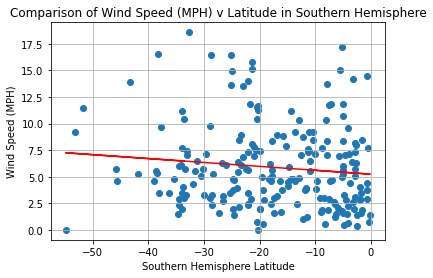

In [23]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = southern["Lat"]
y_values = southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Comparison of Wind Speed (MPH) v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Outputs/wind_speed_v_lat_southern.png')
plt.grid()

### Regression Analysis Wind Speed v Latitude

The Southern Latitude shows some negative relationship (or should it be positive since the axis starts negatively?), between Latitude and Wind Speed, but I don't take much stock in it. Most data is clustered in a very specific region, and the plotting scale of Wind Speed is pretty small (0.0 - 17.5). The Northern Latitude seems to have a non-relationship, it just stays pretty constant. The scale is much different in the Northern Hemisphere (max values approaching near 30) so that may have something to do with how the graph looks.